In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [131]:
df_fert = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '3.1 Fertilizer')
df_fert.columns = df_fert.iloc[2]
df_fert = df_fert.iloc[3:].reset_index(drop = True)

print(df_fert['fertilizer_type'].value_counts())

df_fert[['fertilizer_urea_pct', 'fertilizer_nitrate_pct', 'fertilizer_ammonium_pct', 'fertilizer_p_pct', 'fertilizer_k_pct']] = \
df_fert[['fertilizer_urea_pct', 'fertilizer_nitrate_pct', 'fertilizer_ammonium_pct', 'fertilizer_p_pct', 'fertilizer_k_pct']].fillna(0)

df_fert['N_total_perc'] = df_fert['fertilizer_urea_pct'] + df_fert['fertilizer_nitrate_pct'] + df_fert['fertilizer_ammonium_pct']
df_fert['P_total_perc'] = df_fert['fertilizer_p_pct']
df_fert['K_total_perc'] = df_fert['fertilizer_k_pct']

df_fert.loc[df_fert['fertilizer_type'] == 'Urea - 46.4% N', 'N_total_perc'] = 46.4
df_fert.loc[df_fert['fertilizer_type'] == 'Urea ammonium nitrate solution - 32% N', 'N_total_perc'] = 32
df_fert.loc[df_fert['fertilizer_type'] == 'Super phosphate - 21% P2O5', 'P_total_perc'] = 21

df_fert = df_fert[df_fert['fertilizer_type'] != 'Limestone - 55% CaCO3 / 29%CaO'].reset_index(drop = True)

df_fert['N_kg_per_Ha'] = df_fert['N_total_perc']*df_fert['fertilizer_application_rate'] / 100
df_fert['P_kg_per_Ha'] = df_fert['P_total_perc']*df_fert['fertilizer_application_rate'] / 100
df_fert['K_kg_per_Ha'] = df_fert['K_total_perc']*df_fert['fertilizer_application_rate'] / 100

df_fert = df_fert = df_fert[['farm_identifier', 'N_kg_per_Ha', 'P_kg_per_Ha', 'K_kg_per_Ha']]

N_column = df_fert.groupby('farm_identifier')['N_kg_per_Ha'].sum()
P_column = df_fert.groupby('farm_identifier')['P_kg_per_Ha'].sum()
K_column = df_fert.groupby('farm_identifier')['K_kg_per_Ha'].sum()
field_column = N_column.index

df_fert = pd.DataFrame({'farm_identifier': field_column, 'N_kg_per_Ha': N_column, 'P_kg_per_Ha': P_column, 'K_kg_per_Ha': K_column}).reset_index(drop = True)

print(display(df_fert))

Compose your own NPK                      120
Urea - 46.4% N                             39
Urea ammonium nitrate solution - 32% N     12
Limestone - 55% CaCO3 / 29%CaO              3
Super phosphate - 21% P2O5                  1
Name: fertilizer_type, dtype: int64


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,farm_identifier,N_kg_per_Ha,P_kg_per_Ha,K_kg_per_Ha
0,1,51.9,156.0,0.0
1,7,194.88,0.0,0.0
2,9,353.6,279.2,0.0
3,12,117.0,114.4,0.0
4,13,96.0,0.0,0.0
5,14,96.0,0.0,0.0
6,20,96.0,0.0,0.0
7,35,36.0,92.0,0.0
8,40,194.88,0.0,0.0
9,41,194.88,0.0,0.0


None


In [132]:
df_crop_protect = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '3.2 Crop Protection')
df_crop_protect.columns = df_crop_protect.iloc[2]
df_crop_protect = df_crop_protect.iloc[3:].reset_index(drop = True)

application_column = df_crop_protect.groupby('farm_identifier')['pesticides_applications'].sum()
field_column = application_column.index

df_crop_protect = pd.DataFrame({'farm_identifier': field_column, 'pesticides_applications': application_column}).reset_index(drop = True)

print(display(df_crop_protect))

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,farm_identifier,pesticides_applications
0,1,177
1,13,28
2,14,18
3,20,16
4,35,3
5,40,28
6,41,14
7,72,12
8,86,25
9,87,99


None


In [52]:
#neglect this dataset?- YES
#direct_energy_value is for whole field, not per Ha
df_direct_energy = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = ' 4.1 Direct Energy')
df_direct_energy.columns = df_direct_energy.iloc[2]
df_direct_energy = df_direct_energy.iloc[3:].reset_index(drop = True)

print(df_direct_energy['farm_identifier'].value_counts())
print(df_direct_energy['direct_energy_source'].value_counts())

df_direct_energy = df_direct_energy.drop(columns = ['reporting_year'])

print(display(df_direct_energy))

111    3
398    3
87     3
146    2
86     2
407    2
72     2
143    2
35     2
498    2
462    2
502    2
503    2
310    2
400    2
117    2
399    2
1      2
96     2
92     2
346    2
344    2
94     2
457    2
118    2
397    2
200    2
88     2
119    2
99     2
9      2
151    2
340    2
494    2
499    2
7      2
328    2
145    2
220    2
13     2
20     2
14     2
41     2
40     2
184    2
393    2
467    2
288    2
159    2
497    2
404    2
472    2
474    2
97     2
132    2
222    2
199    2
470    2
293    1
Name: farm_identifier, dtype: int64
diesel - litre              99
electricity (grid) - kWh    21
Name: direct_energy_source, dtype: int64


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


2,farm_identifier,direct_energy_source,direct_energy_value,direct_energy_category
0,146,diesel - litre,19063.8,Field
1,146,electricity (grid) - kWh,444555,Irrigation
2,1,diesel - litre,8294,Field
3,1,diesel - litre,20350,Irrigation
4,340,diesel - litre,17312,Field
...,...,...,...,...
115,111,diesel - litre,4074,Irrigation
116,111,diesel - litre,10595.26,Field
117,111,electricity (grid) - kWh,62992.5,Irrigation
118,470,diesel - litre,7227,Irrigation


None


In [51]:
#neglect this dataset?- YES
df_operation_energy = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '4.2 Operation Energy')
df_operation_energy.columns = df_operation_energy.iloc[2]
df_operation_energy = df_operation_energy.iloc[3:].reset_index(drop = True)

# print(df_operation_energy['farm_identifier'].value_counts())
# print(df_operation_energy['direct_energy_source'].value_counts())

print(df_operation_energy['machinery_fuel_type'].value_counts())

df_operation_energy = df_operation_energy.drop(columns = ['reporting_year', 'machinery_fuel_type'])

print(display(df_operation_energy))

diesel    137
Name: machinery_fuel_type, dtype: int64


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


2,farm_identifier,machinery_type,machinery_operations
0,146,grain drill-notill,4
1,146,biocide spraying,16
2,340,grain drill-notill,7
3,340,biocide spraying,28
4,340,disc harrow,2
...,...,...,...
132,462,biocide spraying,9
133,502,grain drill-notill,1
134,502,biocide spraying,3
135,498,grain drill-notill,2


None


In [133]:
df_irrigation = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '5 Irrigation')
df_irrigation.columns = df_irrigation.iloc[2]
df_irrigation = df_irrigation.iloc[3:].reset_index(drop = True)

# print(df_irrigation['irrigation_power_source'].value_counts())

df_irrigation = df_irrigation[['farm_identifier', 'irrigation_power_source', 'irrigation_pumping_depth', 'irrigation_pumping_distance', 'irrigation_water_value']]

df_irrigation = df_irrigation.rename(columns = {'irrigation_water_value': 'water_applied_mm'})

df_irrigation = df_irrigation.drop([df_irrigation.index[29], df_irrigation.index[4]]).reset_index(drop = True)

#take the average for water applied when repeated

df_irrigation.loc[25, 'water_applied_mm'] = (.045667 + .03) / 2
df_irrigation = df_irrigation.drop([df_irrigation.index[30]]).reset_index(drop = True)

print(df_irrigation['farm_identifier'].value_counts())
print(display(df_irrigation))

118    1
457    1
1      1
293    1
88     1
310    1
117    1
344    1
86     1
494    1
328    1
7      1
499    1
151    1
159    1
41     1
40     1
184    1
467    1
497    1
404    1
472    1
474    1
143    1
72     1
35     1
407    1
462    1
502    1
119    1
9      1
97     1
145    1
399    1
470    1
397    1
200    1
346    1
92     1
503    1
400    1
12     1
146    1
340    1
87     1
220    1
199    1
398    1
111    1
94     1
96     1
20     1
13     1
14     1
288    1
132    1
222    1
393    1
99     1
498    1
Name: farm_identifier, dtype: int64


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


2,farm_identifier,irrigation_power_source,irrigation_pumping_depth,irrigation_pumping_distance,water_applied_mm
0,118,Diesel,42.090909,547.090909,0.042091
1,457,Diesel,48.625,662.75,0.048625
2,399,Diesel,83.333333,11.666667,0.083333
3,470,Diesel,100,5,0.1
4,397,Diesel,90,5,0.09
5,200,Diesel,94.166667,14.5,0.094167
6,346,Diesel,110,30,0.11
7,92,Diesel,90,7,0.09
8,503,Diesel,80,45,0.08
9,400,Diesel,90,10,0.09


None


In [98]:
#drop dataset
df_carbon = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '6 Carbon')
df_carbon.columns = df_carbon.iloc[2]
df_carbon = df_carbon.iloc[3:].reset_index(drop = True)

print(df_carbon['land_management_change'].value_counts())
print(df_carbon['land_management_years_ago'].value_counts())

df_carbon = df_carbon.drop(columns = ['reporting_year', 'land_management_allocation', 'forest_type', 'forest_age'])

print(display(df_carbon))

grass » arable                      60
conventional till » no till         38
reduced till » no till              21
forest » arable                      2
conventional till » reduced till     2
no till » conventional till          1
Name: land_management_change, dtype: int64
30    76
20    10
25     9
5      8
10     7
8      7
15     4
16     2
2      1
Name: land_management_years_ago, dtype: int64


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


2,farm_identifier,land_management_change,land_management_years_ago
0,1,grass » arable,30
1,146,grass » arable,30
2,340,grass » arable,30
3,118,grass » arable,30
4,457,grass » arable,30
...,...,...,...
119,143,conventional till » no till,15
120,407,conventional till » no till,15
121,462,reduced till » no till,30
122,498,reduced till » no till,30


None


In [134]:
#email boris about wet/dry
df_farm_crop_soil = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', sheet_name = '0-2 Farm-Crop-Soil')
df_farm_crop_soil.columns = df_farm_crop_soil.iloc[2]
df_farm_crop_soil = df_farm_crop_soil.iloc[3:].reset_index(drop = True)

df_farm_crop_soil['yield_kg_per_Ha'] = df_farm_crop_soil['product_fresh'] / df_farm_crop_soil['field_size']

df_farm_crop_soil = df_farm_crop_soil[['farm_identifier', 'field_size', 'product_fresh', 'product_finished', 'yield_kg_per_Ha', 'soil_organic_matter']]

df_farm_crop_soil = df_farm_crop_soil.rename(columns = {'field_size': 'field_size_Ha', 'product_fresh': 'product_fresh_kg', 'product_finished': 'product_finished_kg'})

print(display(df_farm_crop_soil))

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


2,farm_identifier,field_size_Ha,product_fresh_kg,product_finished_kg,yield_kg_per_Ha,soil_organic_matter
0,118,450.63,1391579.7,4003780,3088.076027,2.702727
1,457,230.8,809933.76,2040040,3509.245061,2.503333
2,293,79,248720,492480,3148.35443,3.5
3,87,547,2077826.76,4544150,3798.586399,4.111111
4,88,323,1171090.42,2664370,3625.666935,4.08
5,310,112,581475,1518100,5191.741071,3.5
6,117,147,524294.692,1678110,3566.630558,3.7
7,344,83,370948,1031960,4469.253012,3.2
8,86,224,965548.812,2711980,4310.485768,4.125
9,494,96,309138,945990,3220.1875,2.84


None


In [135]:
df_CO2 = pd.read_excel('/mnt/Datasets/Copy of LATAM_ARG_Facundo_result.xlsx', sheet_name = 'summary')

df_CO2 = df_CO2[df_CO2['result'] == 'emissions_per_area'].reset_index(drop = True)

df_CO2 = df_CO2[['farm_identifier', 'value']]
df_CO2 = df_CO2.rename(columns = {'value': 'CO2_kg_per_Ha'})

print(display(df_CO2))

,farm_identifier,CO2_kg_per_Ha
0,503,-3032.06
1,470,-2570.00
2,397,-2400.58
3,399,-2358.06
4,400,-2259.39
5,94,-2195.34
6,96,-1904.26
7,346,-1846.63
8,92,-1782.28
9,111,-1715.88


None


In [139]:
final_merged_df = df_crop_protect.merge(df_fert, on = 'farm_identifier', how = 'left')
final_merged_df = final_merged_df.merge(df_irrigation, on = 'farm_identifier', how = 'left')
final_merged_df = final_merged_df.merge(df_farm_crop_soil, on = 'farm_identifier', how = 'left')
final_merged_df = final_merged_df.merge(df_CO2, on = 'farm_identifier', how = 'left')

final_merged_df['yield_CO2_ratio'] = final_merged_df['yield_kg_per_Ha'] / final_merged_df['CO2_kg_per_Ha']

cols = final_merged_df.columns.drop(['farm_identifier', 'irrigation_power_source'])

final_merged_df[cols] = final_merged_df[cols].apply(pd.to_numeric, errors='coerce')

print(display(final_merged_df))

final_merged_df.to_csv('/mnt/Datasets/Arg_analytical_dataset_2_10_23.csv')

,farm_identifier,pesticides_applications,N_kg_per_Ha,P_kg_per_Ha,K_kg_per_Ha,irrigation_power_source,irrigation_pumping_depth,irrigation_pumping_distance,water_applied_mm,field_size_Ha,product_fresh_kg,product_finished_kg,yield_kg_per_Ha,soil_organic_matter,CO2_kg_per_Ha,yield_CO2_ratio
0,1,177,51.90,156.0,0.0,Diesel,35.000000,0.000000,0.035000,110.00,2.219000e+05,497520,2017.272727,2.560000,171.62,11.754299
1,13,28,96.00,0.0,0.0,Electric,70.000000,758.571429,0.070000,390.00,9.966914e+05,2834220,2555.619026,1.725714,1633.58,1.564428
2,14,18,96.00,0.0,0.0,Electric,50.000000,1850.000000,0.050000,432.00,1.492076e+06,3380854,3453.880194,2.470000,1444.34,2.391321
3,20,16,96.00,0.0,0.0,Electric,70.000000,600.000000,0.070000,240.00,4.097253e+05,1224200,1707.188808,2.250000,1322.25,1.291124
4,35,3,36.00,92.0,0.0,Diesel,40.000000,270.000000,0.040000,285.00,9.958060e+05,2869800,3494.056140,2.600000,-1239.97,-2.817855
5,40,28,194.88,0.0,0.0,Diesel,80.000000,37.500000,0.080000,163.00,6.615000e+05,1518240,4058.282209,3.812500,2044.17,1.985296
6,41,14,194.88,0.0,0.0,Diesel,80.000000,5.000000,0.080000,60.00,2.035925e+05,688840,3393.208800,3.425000,1710.32,1.983961
7,72,12,27.00,0.0,0.0,Diesel,55.000000,207.500000,0.055000,241.00,1.302493e+06,2789980,5404.535270,2.900000,-980.69,-5.510952
8,86,25,116.00,0.0,0.0,Diesel,110.000000,7.500000,0.110000,224.00,9.655488e+05,2711980,4310.485768,4.125000,-1182.40,-3.645539
9,87,99,197.68,154.4,0.0,Electric,100.000000,17.111111,0.100000,547.00,2.077827e+06,4544150,3798.586399,4.111111,367.38,10.339666


None


<Figure size 720x720 with 0 Axes>

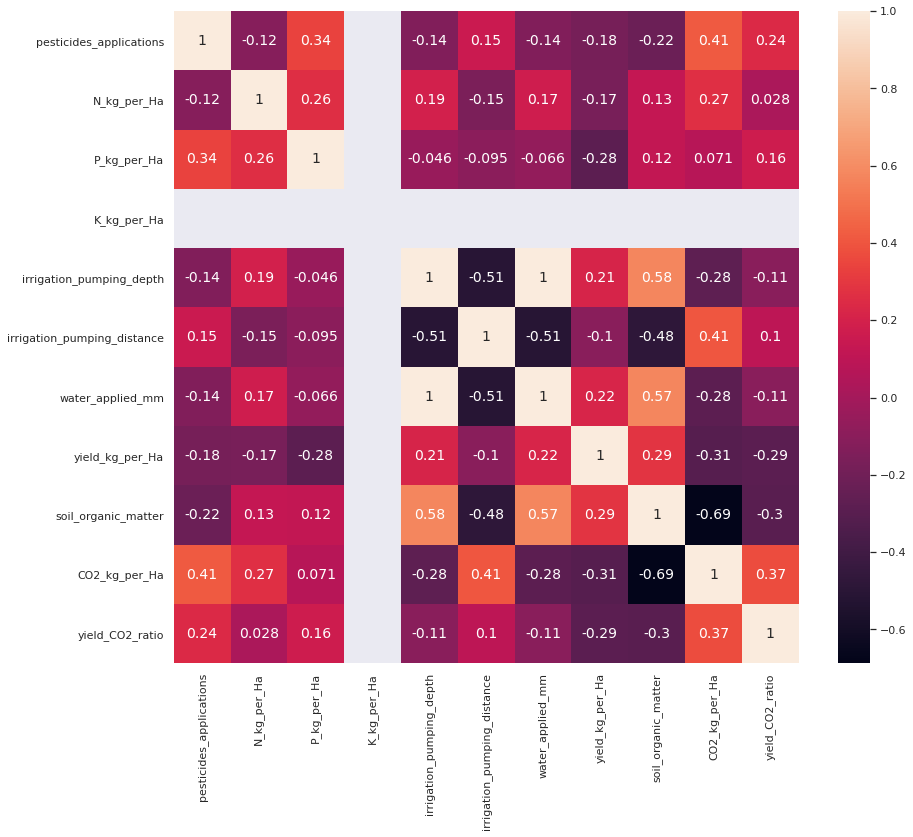

In [137]:
plt.figure(figsize = (10,10))
corr_matrix = final_merged_df.drop(columns = ['farm_identifier', 'irrigation_power_source', 'field_size_Ha', 'product_fresh_kg','product_finished_kg']).corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()